#### Import the required modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data and check its integrity

In [3]:
from google.colab import files
uploaded = files.upload()

In [2]:
#Load the dataset
df=pd.read_csv('diabetes.csv')
#print the first 5 rows to take a look at the data using the head function
df.head()

FileNotFoundError: ignored

In [0]:
#let´s take a look at the shape our data has
df.shape

(768, 9)

In [0]:
#Let's create numpy arrays for features and target
Xunt = df.drop('Outcome',axis=1).values
y = df['Outcome'].values
print(str(Xunt.shape)+' '+str(y.shape))

(768, 8) (768,)


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xunt)
X=scaler.transform(Xunt)

In [0]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Data preparation for Neural Network analysis. Separation intro training and test data

In [0]:
#Import the module for splitting data from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

##### Create and run the model

In [0]:
#import Neural network modules
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential


#we are going to create our first neural network. We will do one input layer (50 neurons), two hidden layers (50 neurons) 
#and an output layer with one neuron
model= Sequential()
model.add(Dense(25,input_dim=8,activation='sigmoid'))
for i in range(2):
    model.add(Dense(30,activation='sigmoid'))
    model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 25)                225       
_________________________________________________________________
dense_77 (Dense)             (None, 30)                780       
_________________________________________________________________
dropout_41 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_42 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 31        
Total params: 1,966
Trainable params: 1,966
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Now we train the model
history = model.fit(X_train, y_train, epochs=18, batch_size=16,
                        validation_data=(X_test, y_test), verbose=1, shuffle=True)

Train on 460 samples, validate on 308 samples
Epoch 1/18
460/460 [==============================] - 1s 2ms/step - loss: 0.7058 - acc: 0.5500 - val_loss: 0.6575 - val_acc: 0.6364
Epoch 2/18
460/460 [==============================] - 0s 104us/step - loss: 0.6767 - acc: 0.6217 - val_loss: 0.6598 - val_acc: 0.6364
Epoch 3/18
460/460 [==============================] - 0s 113us/step - loss: 0.6924 - acc: 0.5804 - val_loss: 0.6584 - val_acc: 0.6364
Epoch 4/18
460/460 [==============================] - 0s 106us/step - loss: 0.6843 - acc: 0.6174 - val_loss: 0.6572 - val_acc: 0.6364
Epoch 5/18
460/460 [==============================] - 0s 106us/step - loss: 0.7011 - acc: 0.6087 - val_loss: 0.6582 - val_acc: 0.6364
Epoch 6/18
460/460 [==============================] - 0s 104us/step - loss: 0.6787 - acc: 0.6174 - val_loss: 0.6573 - val_acc: 0.6364
Epoch 7/18
460/460 [==============================] - 0s 106us/step - loss: 0.6711 - acc: 0.6500 - val_loss: 0.6570 - val_acc: 0.6364
Epoch 8/18
460/460

Hola

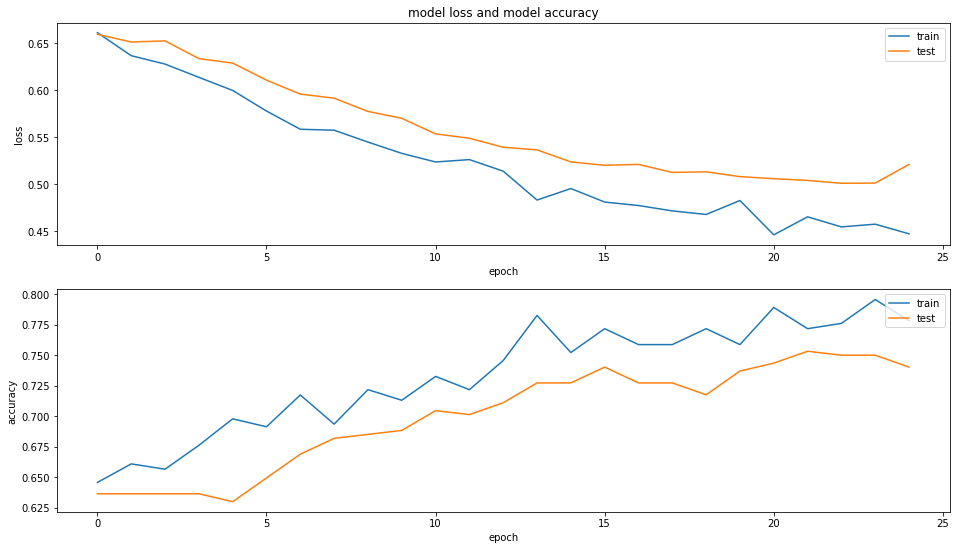

In [0]:
plt.figure(1, figsize=(16, 9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss and model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [0]:
model1= Sequential()
model1.add(Dense(50,input_dim=8,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Now we train the model
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=10,
                        validation_data=(X_test, y_test), verbose=1, shuffle=True)

Train on 460 samples, validate on 308 samples
Epoch 1/50
460/460 [==============================] - 1s 1ms/step - loss: 0.6647 - acc: 0.6500 - val_loss: 0.6494 - val_acc: 0.6526
Epoch 2/50
460/460 [==============================] - 0s 214us/step - loss: 0.6354 - acc: 0.6587 - val_loss: 0.6202 - val_acc: 0.6753
Epoch 3/50
460/460 [==============================] - 0s 204us/step - loss: 0.6024 - acc: 0.6935 - val_loss: 0.6073 - val_acc: 0.7045
Epoch 4/50
460/460 [==============================] - 0s 218us/step - loss: 0.5741 - acc: 0.7109 - val_loss: 0.5741 - val_acc: 0.6948
Epoch 5/50
460/460 [==============================] - 0s 227us/step - loss: 0.5566 - acc: 0.7370 - val_loss: 0.5564 - val_acc: 0.7143
Epoch 6/50
460/460 [==============================] - 0s 218us/step - loss: 0.5365 - acc: 0.7391 - val_loss: 0.5610 - val_acc: 0.7045
Epoch 7/50
460/460 [==============================] - 0s 225us/step - loss: 0.5421 - acc: 0.7283 - val_loss: 0.5342 - val_acc: 0.7208
Epoch 8/50
460/460

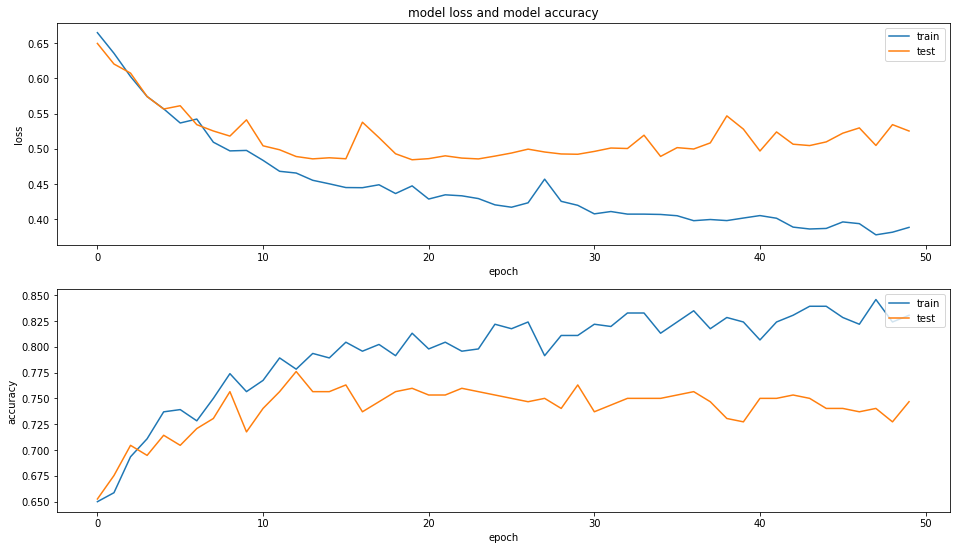

In [0]:
plt.figure(1, figsize=(16, 9))
plt.subplot(2,1,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss and model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

Study the effect of the following parameters in the accuracy at the model. The important accuracy is the test one but make sure to check your training accuracy too to ensure that your model is not overfitting. Study the role of the following parameters:
-Number of layers 
-Number of neurons per layer (change the number between layers to study its effect)
-Activation function
-Number of samples test 

Now try to do the same thing using the Graduate admission dataset from the first class. Make sure you convert all the inputs in the scale from 0 to 1. 